In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

# Data Load

In [2]:
titanic_df = pd.read_csv('../dataset/titanic3.csv')
tdf = titanic_df.copy()
display(tdf.head(2))
tdf.info()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Column별 전처리

##### Age

    # drop / mean / median

In [3]:
age_tdf = tdf[['age','survived']]
age_tdf.isnull().sum()  #263개

drop_null= age_tdf.dropna(subset=['age'],how='any',axis=0)

fill_mean= age_tdf.copy()
fill_mean['age']= age_tdf['age'].fillna(age_tdf['age'].mean())

fill_median = age_tdf.copy()
fill_median['age']= age_tdf['age'].fillna(age_tdf['age'].median())

Text(0.5, 1.0, 'fill_median')

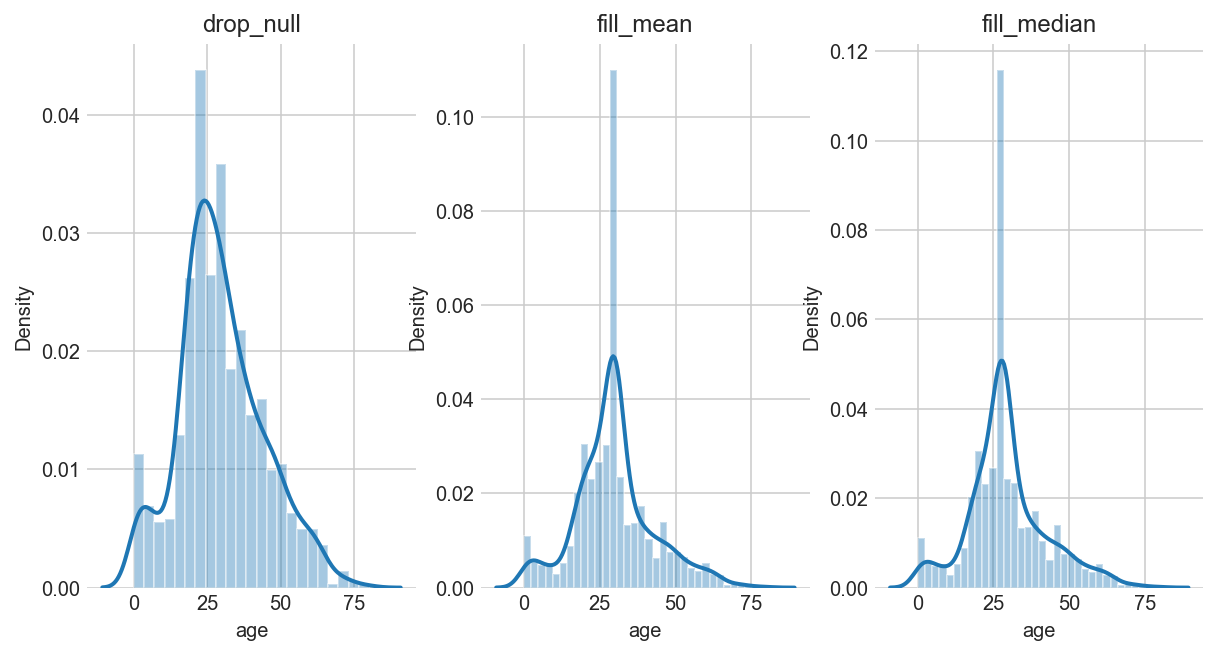

In [4]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(drop_null['age'],ax=ax1)
sns.distplot(fill_mean['age'],ax=ax2)
sns.distplot(fill_median['age'],ax=ax3)

ax1.set_title('drop_null')
ax2.set_title('fill_mean')
ax3.set_title('fill_median')

In [5]:
tdf[['name']].head(1) #결측값 없음

,name
0,"Allen, Miss. Elisabeth Walton"


In [6]:
# name 이름 빼오기 사용자함수
def get_title(x):
    return x.split(', ')[1].split('. ')[0]
tdf['title'] = tdf['name'].apply(lambda x : get_title(x))
tdf['title'].unique()
tdf['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Lady              1
Dona              1
Mme               1
the Countess      1
Capt              1
Jonkheer          1
Don               1
Sir               1
Name: title, dtype: int64

In [7]:
# tdf age 와 title 비교
# age 의 NUll값만 있는 df 추출 , title과 비교

In [8]:
# pivot_by_name = pd.pivot_table(data=tdf,index='title',columns='sex',values='age',aggfunc=['max','min'])

In [9]:
# pivot_by_name

In [10]:
# pivot_by_name.loc['Master']

<AxesSubplot:xlabel='pclass', ylabel='age'>

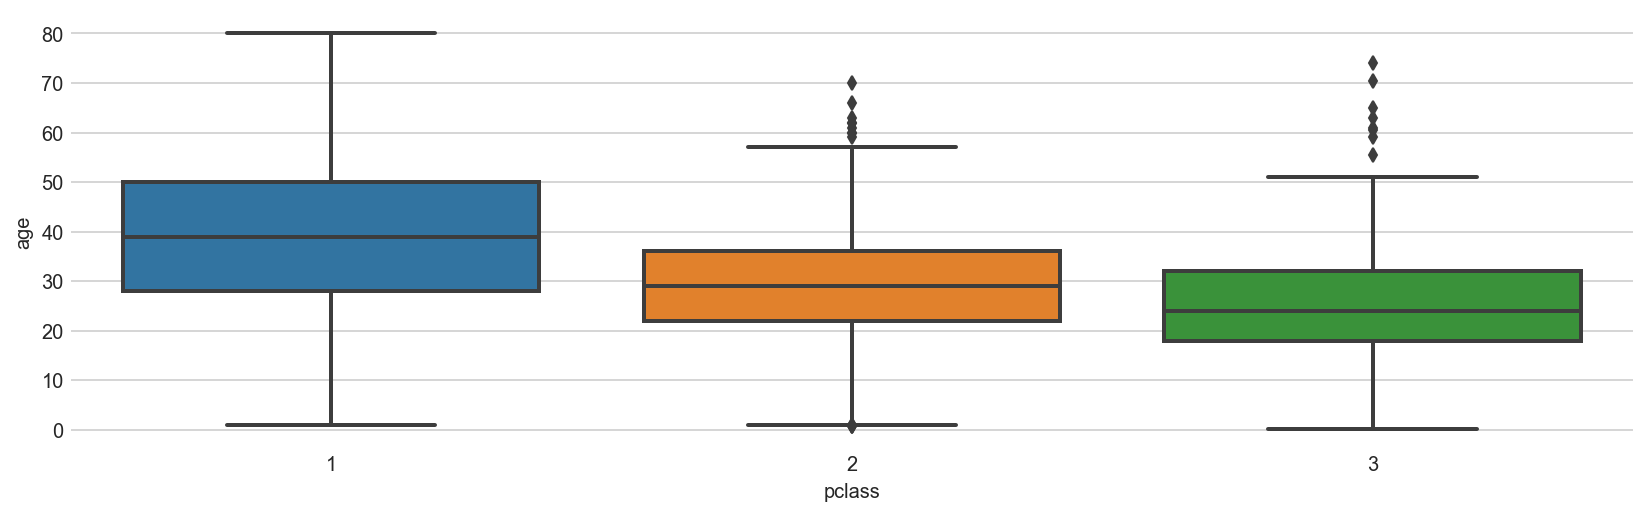

In [11]:
sns.boxplot(data=tdf,x='pclass',y='age')

In [12]:
tdf[(tdf['pclass']==1)&(tdf['title']=='Mr')]['age'].describe()

count    132.000000
mean      41.450758
std       13.489020
min       17.000000
25%       30.000000
50%       41.500000
75%       50.000000
max       80.000000
Name: age, dtype: float64

In [13]:
tdf[(tdf['pclass']==2)&(tdf['title']=='Mr')]['age'].describe()

count    137.000000
mean      32.346715
std       11.862038
min       14.000000
25%       24.000000
50%       30.000000
75%       38.000000
max       70.000000
Name: age, dtype: float64

In [14]:
tdf[tdf['age'].isnull()==1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",Mr
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA",Mr
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN,Mr
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY",Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,NaN,NaN,NaN,Mr
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN,Mr
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,Mr
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN,Mr


In [15]:
tdf[(tdf['pclass'] == 1) & (tdf['age'].isnull()==1)][['title','age']]
# tdf[(tdf['pclass'] == 1) & (tdf['age'].isnull()==1)]['title']

,title,age
15,Mr,NaN
37,Mr,NaN
40,Dr,NaN
46,Mr,NaN
59,Mrs,NaN
...,...,...
283,Mr,NaN
293,Mrs,NaN
297,Mrs,NaN
318,Mr,NaN


In [16]:
tdf[(tdf['pclass'] == 1)&(tdf['title']=='Mr')]['age'].describe()

count    132.000000
mean      41.450758
std       13.489020
min       17.000000
25%       30.000000
50%       41.500000
75%       50.000000
max       80.000000
Name: age, dtype: float64

In [17]:
title_list = tdf['title'].unique().tolist()

In [18]:
p1 = tdf[(tdf['pclass']==1)&(tdf['age'].isnull()==1)]
p2 = tdf[(tdf['pclass']==2)&(tdf['age'].isnull()==1)]
p3 = tdf[(tdf['pclass']==3)&(tdf['age'].isnull()==1)]

In [19]:
for i in title_list:
    p1.loc[p1['title']==i,'age'] = tdf[(tdf['pclass']==1) & (tdf['title']==i)]['age'].mean()
    p2.loc[p2['title']==i,'age'] = tdf[(tdf['pclass']==2) & (tdf['title']==i)]['age'].mean()
    p3.loc[p3['title']==i,'age'] = tdf[(tdf['pclass']==3) & (tdf['title']==i)]['age'].mean()

In [20]:
tdf[(tdf['pclass']==1)&(tdf['age'].isnull()==1)] = p1
tdf[(tdf['pclass']==2)&(tdf['age'].isnull()==1)] = p2
tdf[(tdf['pclass']==3)&(tdf['age'].isnull()==1)] = p3

<AxesSubplot:xlabel='age', ylabel='Density'>

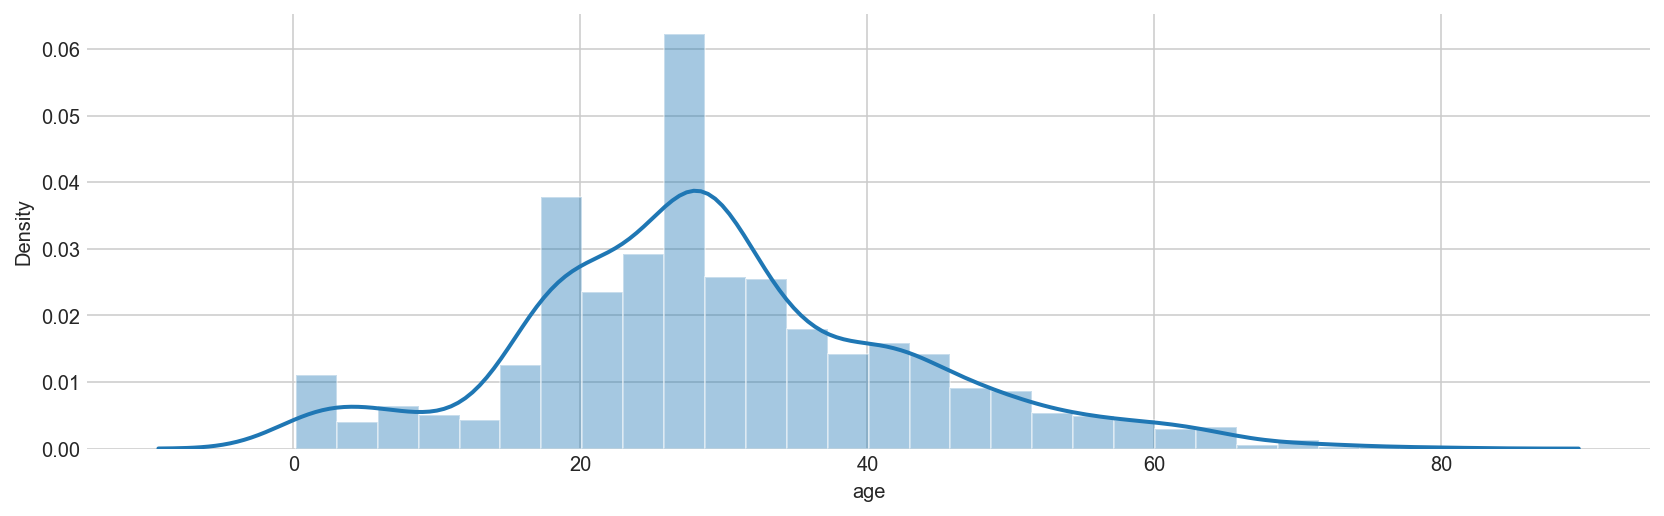

In [21]:
sns.distplot(tdf['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

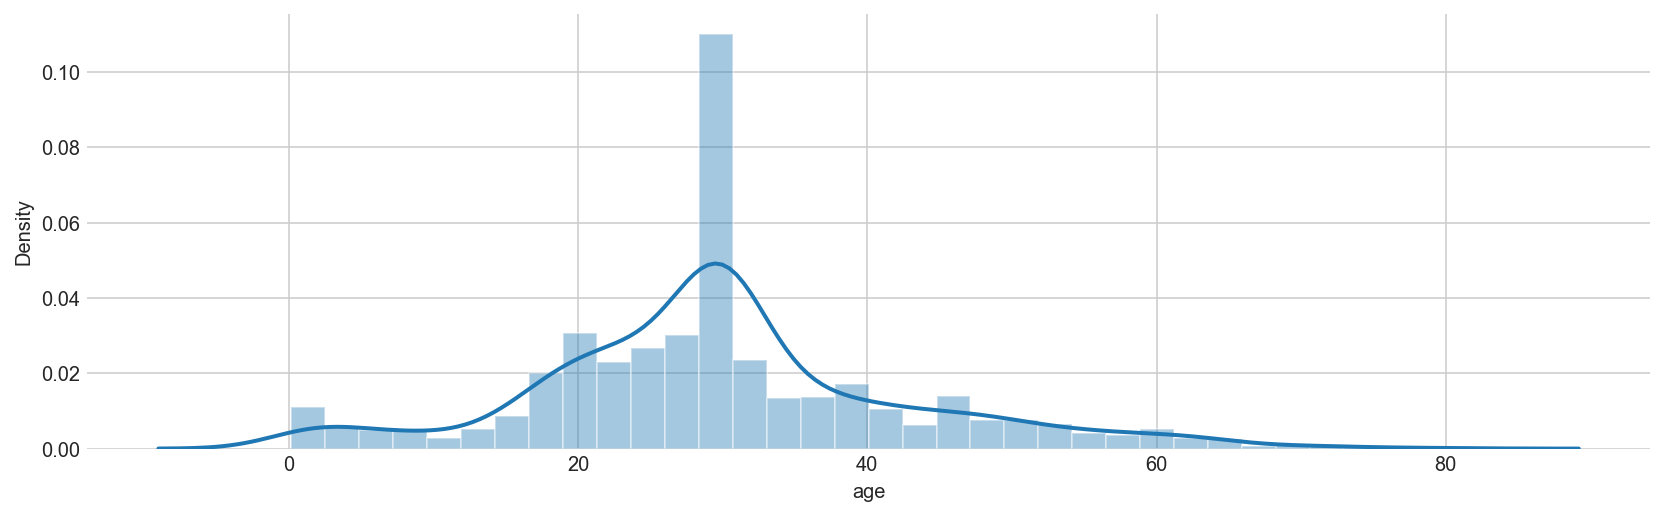

In [22]:
sns.distplot(fill_mean['age'])

In [23]:
tdf[tdf['age'].isnull()==1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
1076,3,0,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,NaN,NaN,NaN,Ms


In [24]:
tdf[tdf['title']=='Ms']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
546,2,1,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,NaN,S,9,NaN,Spain,Ms
1076,3,0,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,NaN,NaN,NaN,Ms


In [25]:
tdf[(tdf['pclass']==2) & (tdf['title']==i)]['age'].mean()

28.0

In [26]:
tdf['age'] = tdf['age'].fillna(tdf[(tdf['pclass']==2) & (tdf['title']==i)]['age'].mean())

In [27]:
tdf['age'].isnull().sum()

0

#### Embarked

    # c / s / q

In [28]:
tdf['embarked'].value_counts()
# idxmax = S
tdf['embarked'].isnull().sum()
#fillna with idxmax

2

#### fare

<AxesSubplot:xlabel='fare', ylabel='age'>

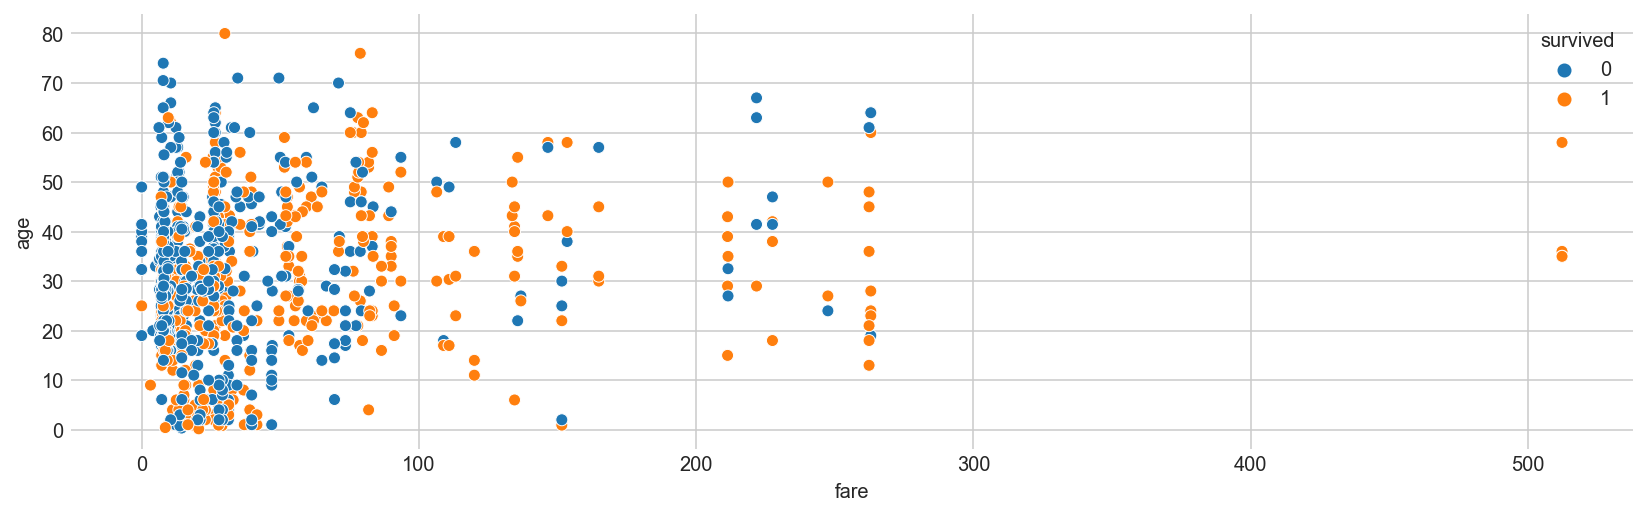

In [29]:
tdf['fare'].isnull().sum()
sns.scatterplot(data=tdf,x='fare',y='age',hue='survived')

<AxesSubplot:xlabel='pclass', ylabel='fare'>

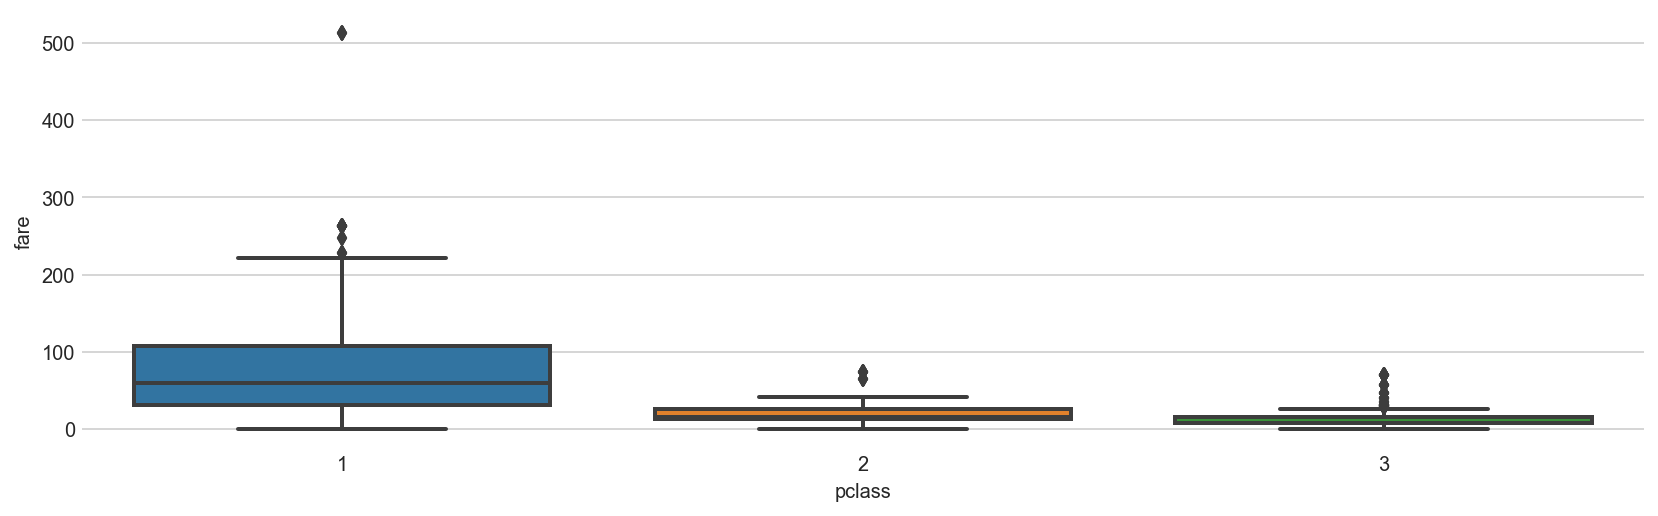

In [30]:
sns.boxplot(data=tdf,x='pclass',y='fare')

In [31]:
tdf['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [32]:
tdf[tdf['pclass']==1]['fare'].describe()

count    323.000000
mean      87.508992
std       80.447178
min        0.000000
25%       30.695800
50%       60.000000
75%      107.662500
max      512.329200
Name: fare, dtype: float64

In [33]:
tdf[tdf['pclass']==2]['fare'].describe()

count    277.000000
mean      21.179196
std       13.607122
min        0.000000
25%       13.000000
50%       15.045800
75%       26.000000
max       73.500000
Name: fare, dtype: float64

In [34]:
tdf[tdf['pclass']==3]['fare'].describe()

count    708.000000
mean      13.302889
std       11.494358
min        0.000000
25%        7.750000
50%        8.050000
75%       15.245800
max       69.550000
Name: fare, dtype: float64

In [35]:
tdf[tdf['fare'].isnull()==1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,Mr


In [36]:
tdf['fare'] = tdf['fare'].fillna(tdf[tdf['pclass']==3]['fare'].mean())

In [37]:
tdf[tdf['fare'].isnull()==1]['fare']

Series([], Name: fare, dtype: float64)

In [38]:
tdf['fare'].isnull().sum()

0

##### Category

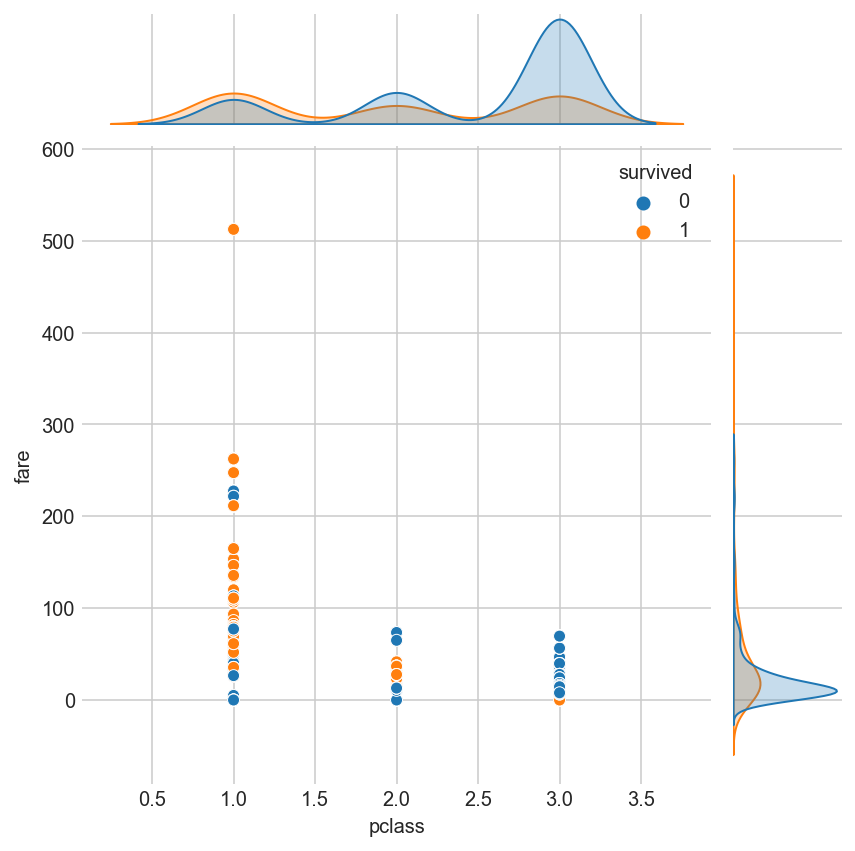

In [39]:
sns.jointplot(data=tdf,x='pclass',y='fare',hue='survived')

<AxesSubplot:xlabel='fare', ylabel='Count'>

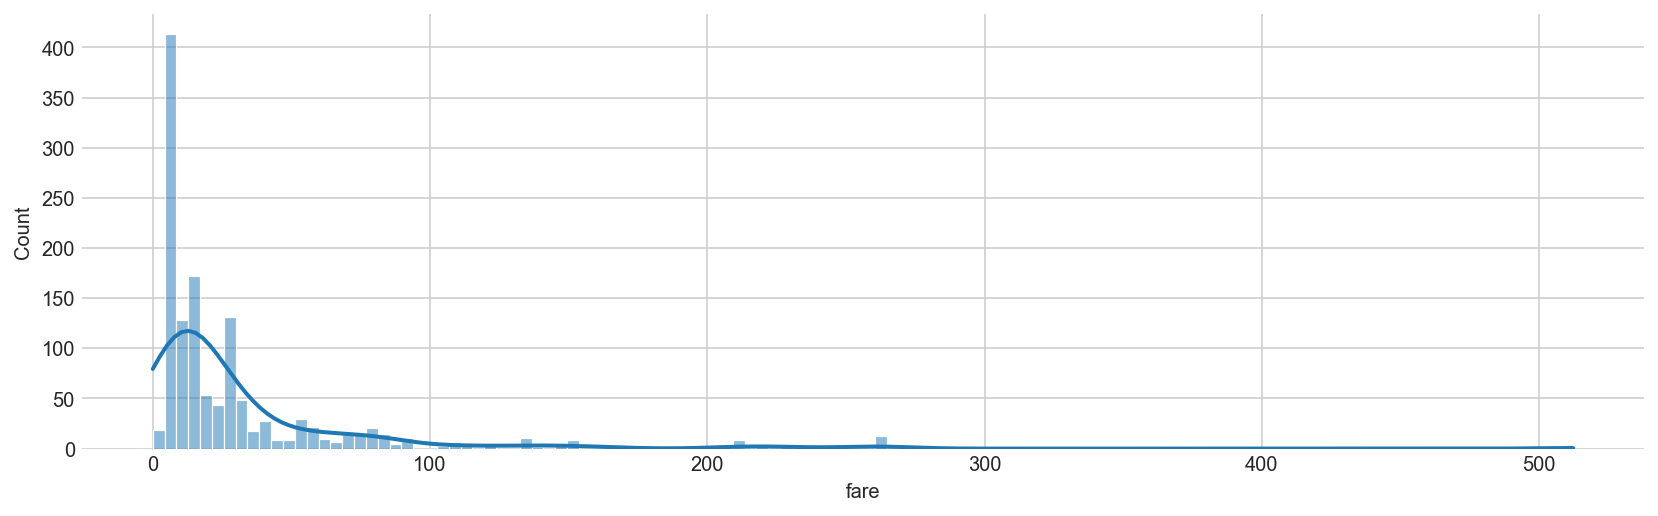

In [40]:
sns.histplot(tdf['fare'], kde=True)

In [41]:
tdf[tdf['fare'] <= 100]['fare'].describe()

count    1225.000000
mean       22.282247
std        20.637027
min         0.000000
25%         7.895800
50%        13.000000
75%        27.445800
max        93.500000
Name: fare, dtype: float64

In [42]:
tdf['fare'].describe()

count    1309.000000
mean       33.280206
std        51.741830
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [43]:
def fare_cat(x):
    cat = ''
    if x <= 8 : cat = 5
    elif x <= 13 : cat = 4
    elif x <= 28 : cat = 3
    elif x <= 100 : cat = 2
    else: cat = 1
    return cat

tdf['fare_cat'] = tdf['fare'].apply(lambda x : fare_cat(x))
tdf[['fare','fare_cat']]

,fare,fare_cat
0,211.3375,1
1,151.5500,1
2,151.5500,1
3,151.5500,1
4,151.5500,1
...,...,...
1304,14.4542,3
1305,14.4542,3
1306,7.2250,5
1307,7.2250,5


In [44]:
tdf.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,fare_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1


age_cat

In [45]:
tdf['age'].describe()

count    1309.000000
mean       29.518416
std        13.408144
min         0.170000
25%        21.000000
50%        28.318910
75%        36.500000
max        80.000000
Name: age, dtype: float64

In [46]:
def get_cat(age):
    cat = ''
    if age <= 10: cat = 'young'
    elif age <= 20: cat = 'teen'
    elif age <= 30: cat = 'adult'
    elif age <= 60: cat = 'mature'
    else: cat = 'elder'
    return cat

tdf['age_cat'] = tdf['age'].apply(lambda x: get_cat(x))

In [47]:
tdf.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,fare_cat,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1,adult


<AxesSubplot:xlabel='age_cat', ylabel='count'>

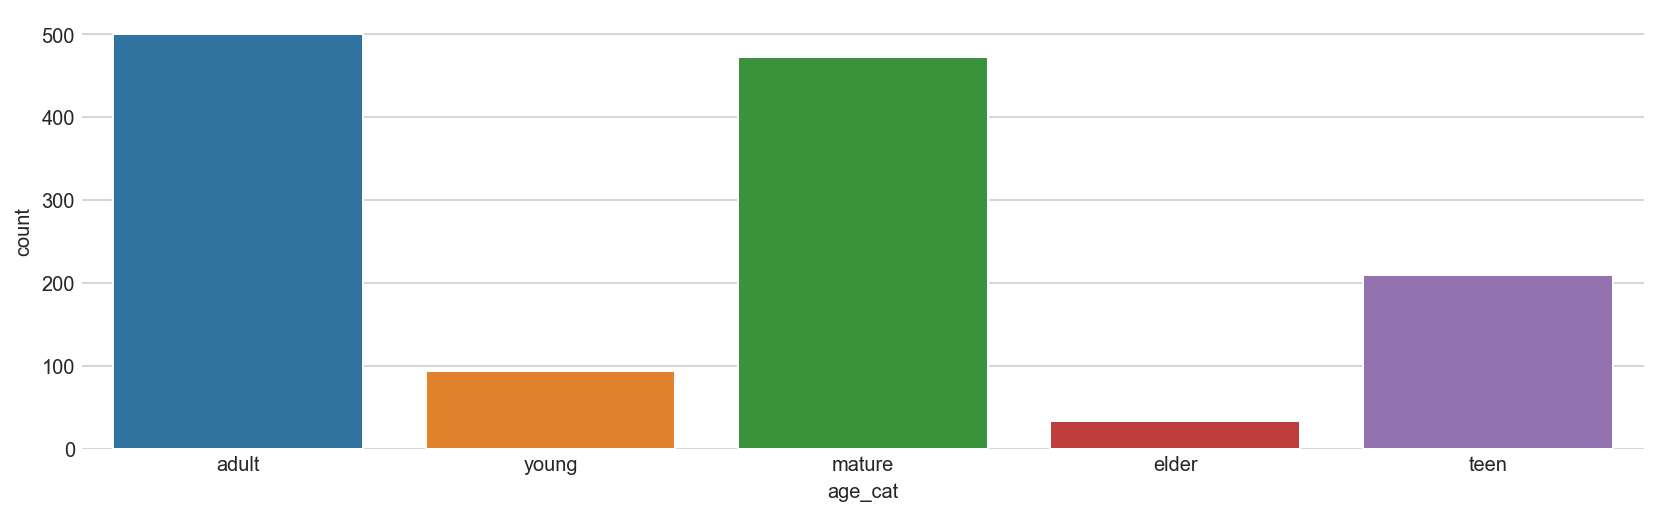

In [48]:
sns.countplot('age_cat',data=tdf)

family cat

In [49]:
tdf['family'] = tdf['sibsp'] + tdf['parch'] + 1
tdf.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,fare_cat,age_cat,family
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,1,adult,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,1,young,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,1,young,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,adult,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,1,adult,4


Encoding

In [50]:
# embarked onehot encoding : sex, embarked

onehot_sex = pd.get_dummies(tdf['sex'])
onehot_embarked = pd.get_dummies(tdf['embarked'], prefix='town')
tdf = pd.concat([tdf,onehot_sex,onehot_embarked], axis=1)
tdf.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,home.dest,title,fare_cat,age_cat,family,female,male,town_C,town_Q,town_S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,...,"St Louis, MO",Miss,1,adult,1,1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",Master,1,young,4,0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",Miss,1,young,4,1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",Mr,1,adult,4,0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",Mrs,1,adult,4,1,0,0,0,1


In [51]:
tdf.fare_cat.value_counts()

5    360
3    320
2    284
4    261
1     84
Name: fare_cat, dtype: int64

In [52]:
#  전처리 사용자 함수 
from sklearn.preprocessing import LabelEncoder

def label_encoding(tdf):
    le = LabelEncoder()
    tdf.age_cat = le.fit_transform(tdf.age_cat)
    return tdf
    
def drop_feature(tdf):
    tdf.drop(['sex','sibsp','parch','embarked'],axis=1,inplace=True)
    return tdf

def transform_features(tdf):
    tdf = label_encoding(tdf)
    tdf = drop_feature(tdf)
    return tdf

tdf = transform_features(tdf)
tdf.head()

,pclass,survived,name,age,ticket,fare,cabin,boat,body,home.dest,title,fare_cat,age_cat,family,female,male,town_C,town_Q,town_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,24160,211.3375,B5,2,NaN,"St Louis, MO",Miss,1,0,1,1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.92,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",Master,1,4,4,0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,1,4,4,1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,0,4,0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,1,0,4,1,0,0,0,1


In [53]:
tdf['title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Lady              1
Dona              1
Mme               1
the Countess      1
Capt              1
Jonkheer          1
Don               1
Sir               1
Name: title, dtype: int64

In [54]:
def title_cat(x):
    if x == 'Mr': cat = 0
    elif x == 'Miss' : cat = 1
    elif x == 'Mrs': cat = 2
    elif x == 'Master': cat = 3
    else:
        cat = 4
    return cat

tdf['title_cat'] = tdf['title'].apply(lambda x : title_cat(x))
tdf[['title','title_cat']]

,title,title_cat
0,Miss,1
1,Master,3
2,Miss,1
3,Mr,0
4,Mrs,2
...,...,...
1304,Miss,1
1305,Miss,1
1306,Mr,0
1307,Mr,0


In [55]:
no_title_test = tdf[['survived','fare_cat','family','female','male','town_C','town_Q','town_S','pclass','title_cat']]

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = no_title_test['survived'] # 종속변수
X_t_df = no_title_test.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화"
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


(1047, 9)
(262, 9)


In [57]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.78, lr 정확도:0.81


In [58]:
tdf

,pclass,survived,name,age,ticket,fare,cabin,boat,body,home.dest,title,fare_cat,age_cat,family,female,male,town_C,town_Q,town_S,title_cat
0,1,1,"Allen, Miss. Elisabeth Walton",29.000000,24160,211.3375,B5,2,NaN,"St Louis, MO",Miss,1,0,1,1,0,0,0,1,1
1,1,1,"Allison, Master. Hudson Trevor",0.920000,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",Master,1,4,4,0,1,0,0,1,3
2,1,0,"Allison, Miss. Helen Loraine",2.000000,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,1,4,4,1,0,0,0,1,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.000000,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,1,0,4,0,1,0,0,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.000000,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,1,0,4,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.500000,2665,14.4542,NaN,NaN,328.0,NaN,Miss,3,3,2,1,0,1,0,0,1
1305,3,0,"Zabour, Miss. Thamine",17.360874,2665,14.4542,NaN,NaN,NaN,NaN,Miss,3,3,2,1,0,1,0,0,1
1306,3,0,"Zakarian, Mr. Mapriededer",26.500000,2656,7.2250,NaN,NaN,304.0,NaN,Mr,5,0,1,0,1,1,0,0,0
1307,3,0,"Zakarian, Mr. Ortin",27.000000,2670,7.2250,NaN,NaN,NaN,NaN,Mr,5,0,1,0,1,1,0,0,0


In [59]:
# 사용자 함수
def fillna_age_mean(tdf):
    most_town = tdf['embarked'].value_counts(dropna=True).idxmax()
    tdf['embarked'] = tdf['embarked'].fillna(most_town)
    tdf['fare'] = tdf['fare'].fillna(tdf[tdf['pclass']==3]['fare'].mean())
    return tdf

def drop_features(tdf):
    tdf = tdf.drop(['name','cabin','ticket','boat','body','home.dest'],axis=1)
    return tdf

def transform_features(tdf):
    tdf = fillna_age_mean(tdf)
    tdf = drop_features(tdf)
    return tdf


In [60]:
불필요한 column 제거
cabin / boat / body / home.dest 결측값 많음

결측값 처리
age / fare / embarked

# age Null 값 처리 : mean 대체 vs drop?
# 그림을 그려서 히스토그램/커널 밀도 그래프 확인
# mean << 평균값에 많은 빈도수로 왜곡 될 가능성이 높음
# drop << 데이터의 손실이 많음

#Pclass는 요금에 따라 겹침


SyntaxError: invalid syntax (<ipython-input-60-d12821eb9684>, line 1)